# Project 1

Joseph Tiu
October 9, 2021

In this lab, we will be taking a closer look at airfoils. An airfoil is an 'infinite' wing which implies no tip effects. This means what airflow over the wing can be generalized into just 2-dimensions

### Problem 1
We will be plotting two airfoils from the NACA series. These airfoils are generated from an equation and depend on only a few parameters, given by their NACA numbers. The airfoils will be plotted with unit chord ($c = 1$)

#### 1.1
In this subsection, we want to start by plotting symmetric airfoils using Python

First, we will need to import the numpy and pyplot packages which would help us with plotting the airfoil based on the given parameters

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now, we can use the given equation to find a normalized thickness on either side of the camber line using a normalized $\tau$ variable ($t$) and a normalized $x$ variable:

$
\begin{equation}
\frac{z_t}{c} = \frac{t}{0.2}[0.2969\sqrt{\frac{x}{c}} - 0.1260\frac{x}{c} - 0.3516\frac{x}{c}^2 + 0.2843\frac{x}{c}^3 - 0.1015\frac{x}{c}^4]
\end{equation}
$

We can do this by first generating a vector of x values from 0 to $1$. Since we are using and calculating normalized x and z-values, we can see that %\tau$ is already normalized with respect to chord (since $\tau$ is maximum thickness as a fraction of chord). We can simply plug these into a Python function as shown below:

In [3]:
#This function creates the points for a symmetric NACA airfoil based on the last two digits (tau)
def SymmetricNACA(c, tau):
    #Calculate t as a percentage
    t = tau/100
    #Make a vector x from 0 to 1 with 201 points
    x_norm = np.linspace(0, 1, 201)
    #Calculates z_t/c (thickness on either side of the camper line which is flat for symmetric airfoils)
    z_t_norm = (t/0.2)*(0.2969*((x_norm)**(1/2)) - 0.1260*(x_norm) - 0.3516*((x_norm)**2) + 0.2843*((x_norm)**3) - 0.1015*((x_norm)**4))
    #Returns x and z_t as a tuple after redimensionalizing with c
    return x_norm*c, z_t_norm*c

#This function plots a symmetric airfoil given the x and z_thickness points
def PlotSymmetricAifroil(x, z_t, name):
    #Upper surface is just the thickness (zero camber)
    plt.plot(x, z_t, label='{} Upper'.format(name))
    #Lower surface is just the negative thickness (zero camber)
    plt.plot(x, -z_t, label='{} Lower'.format(name))
    #The camber line is at the average of upper and lower = 0
    plt.plot(x, (z_t - z_t)/2, linestyle='--', label='{} Camber'.format(name))
    plt.plot(x, np.zeros(len(x)), linestyle=':', label='Chord')
    plt.legend()
    plt.title("{} Airfoil Geometry".format(name))
    plt.xlabel("$x$")
    plt.ylabel("$z$")
    plt.axis('equal')
    plt.grid()
    plt.show()

We now have our function defined, now we can use it to plot symmetric airfoils. We can only plot symmetric airfoils (with what we have so far) since we do not consider at all the first two numbers of the NACA deisgnation which is the maximum camber and location of maximum camber. Out equation only really tells us the thickness on either side using the thickness designation.

Below, we genrated points for a NACA 0025 (arbitrarily chosen) airfoil.

Since our points were generated from a single sweep, giving us the thickness from the camber (we can assume a length is a positive value), we can assume that the returned z-values refer to the upper surface. Since this is a symmetric airfoil, we can simply take the negative z-values as the lower surface points.

We can expect the camber line to be horizontal since we have an even thickness on both sides. We can confirm this by plotting the camber line as the average of the two upper and lower surfaces which will give us a vector of zeros:
$
\begin{equation}
\frac{z_u - z_l}{2} = 0
\end{equation}
$
We can use numpy's max function to see the maximum thickness along the airfoil (since it is symmetric) as approximately 0.25 [units] which we would expect since the NACA 0025 airfoil should have a maximum thickness of 25% of $c$ which is 0.25 [units]

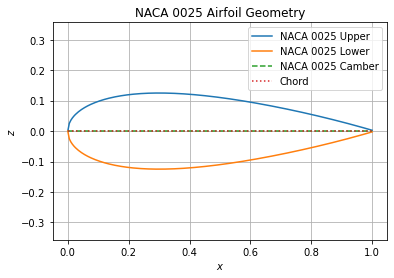

Maximum thickness of the airfoil: (0.25007194330820953)1


In [4]:
#Set parameters for NACA 0025 with unit chord
c = 1
tau = 25

#Run function to generate x and z values for the symmetric airfoil
NACA0025_x, NACA0025_z = SymmetricNACA(c, tau)

#Plot the upper, lower
PlotSymmetricAifroil(NACA0025_x, NACA0025_z, "NACA 0025")

print("Maximum thickness of the airfoil: ({}){}".format(2*np.max(NACA0025_z), c))

#### 1.2
Now that we can plot symmetric airfoils, we can simply add (or subtract) a camber value to the thickness values from the previous subsection. We now have another equation for the camber line:
$
\begin{equation}
\frac{z_c}{c} = 
\left\{
\begin{array}{ll}
      \frac{m}{p^2}(2p\frac{x}{c} - \frac{x}{c}^2) & 0 \leq x \leq pc \\
      \frac{m}{(1-p)^2}((1-2p)+2p\frac{x}{c} - \frac{x}{c}^2) & pc \leq x \leq c\\
\end{array} 
\right.
\end{equation}
$
We can implement this to another Python function which takes inputs $m$ and $p$ and applying similar methods to the previous function:

In [5]:
#This function creates a cambered airfoil using the given equation and the thickness equation from the previous part
def CamberedNACA(c, m_num, p_num, tau):
    #Calculate m, p and t as percentages or tenths
    m = m_num/100
    p = p_num/10
    t = tau/100

    #Create a x range for 0 to p and p to 1 
    x_norm_1 = np.linspace(0, p, 201)
    x_norm_2 = np.linspace(p, 1, 201)

    #Calculate the camber line using the equations
    z_c_norm_1 = (m/(p**2))*(2*p*x_norm_1 - x_norm_1**2)
    z_c_norm_2 = (m/((1-p)**2))*((1-2*p) + 2*p*x_norm_2 - x_norm_2**2)

    #Calculate the thickness using the previous equation
    z_t_norm_1 = (t/0.2)*(0.2969*((x_norm_1)**(1/2)) - 0.1260*(x_norm_1) - 0.3516*((x_norm_1)**2) + 0.2843*((x_norm_1)**3) - 0.1015*((x_norm_1)**4))
    z_t_norm_2 = (t/0.2)*(0.2969*((x_norm_2)**(1/2)) - 0.1260*(x_norm_2) - 0.3516*((x_norm_2)**2) + 0.2843*((x_norm_2)**3) - 0.1015*((x_norm_2)**4))

    #Concatenate each plot and return the x, camber and thickness and multiply by chord
    x = c*np.concatenate((x_norm_1, x_norm_2), axis = 0)
    z_c = c*np.concatenate((z_c_norm_1, z_c_norm_2), axis = 0)
    z_t = c*np.concatenate((z_t_norm_1, z_t_norm_2), axis = 0)

    return x, z_c, z_t

#This function plots a cambered airfoil using the x, camber and thickness points
def PlotCamberedAifroil(x, z_c, z_t, name):
    #Upper surface = camber + thickness
    plt.plot(x, z_c + z_t, label='{} Upper'.format(name))
    #Lower surface = camber - thickness
    plt.plot(x, z_c - z_t, label='{} Lower'.format(name))
    #Camber = camber
    plt.plot(x, z_c, linestyle='--', label='{} Camber'.format(name))
    #Chord is a line of zeros
    plt.plot(x, np.zeros(len(x)), linestyle=':', label='Chord')
    plt.legend()
    plt.title("{} Airfoil Geometry".format(name))
    plt.xlabel("$x$")
    plt.ylabel("$z$")
    plt.axis('equal')
    plt.grid()
    plt.show()

We can use the new function to plot a NACA 4425 (again, arbitrary). We can expect that at the $x = \frac{4}{10}c$ point, we will have a maximum camber of 4% of 1 or 0.04. We also plotted two more (arbitrary) airfoils NACA 9910 and NACA 1418.

Using numpy's max() function, we can determine the maximum value of the camber line and see if this corresponds to the input values:

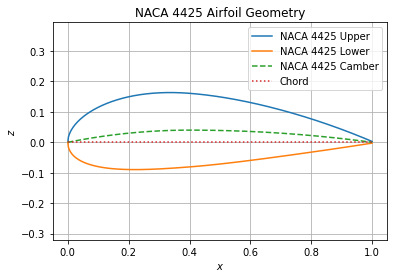

Maximum camber of the airfoil: (0.04)1


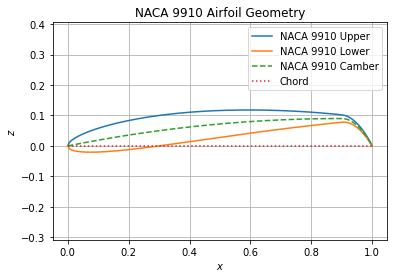

Maximum camber of the airfoil: (0.09000000000000012)1


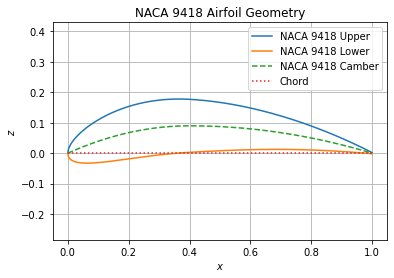

Maximum camber of the airfoil: (0.09)1


In [6]:
#Define numbers for a NACA 4425 airfoil
c = 1
m = 4
p = 4
tau = 25

#Use function to create points of airfoil
NACA4425_x, NACA4425_z_c, NACA4425_z_t = CamberedNACA(c, m, p, tau)

#Use function to plot points ot airfoil
PlotCamberedAifroil(NACA4425_x, NACA4425_z_c, NACA4425_z_t, "NACA 4425")

#Use numpy max to find the max camber
print("Maximum camber of the airfoil: ({}){}".format(np.max(NACA4425_z_c), c))


#Define numbers for a NACA 9910 airfoil
c = 1
m = 9
p = 9
tau = 10

#Use function to create points of airfoil
NACA9910_x, NACA9910_z_c, NACA9910_z_t = CamberedNACA(c, m, p, tau)

#Use function to plot points ot airfoil
PlotCamberedAifroil(NACA9910_x, NACA9910_z_c, NACA9910_z_t, "NACA 9910")

#Use numpy max to find the max camber
print("Maximum camber of the airfoil: ({}){}".format(np.max(NACA9910_z_c), c))


#Define numbers for a NACA 9418 airfoil
c = 1
m = 9
p = 4
tau = 18

#Use function to create points of airfoil
NACA9418_x, NACA9418_z_c, NACA9418_z_t = CamberedNACA(c, m, p, tau)

#Use function to plot points ot airfoil
PlotCamberedAifroil(NACA9418_x, NACA9418_z_c, NACA9418_z_t, "NACA 9418")

#Use numpy max to find the max camber
print("Maximum camber of the airfoil: ({}){}".format(np.max(NACA9418_z_c), c))

#### 1.3
In this subsection, we will be looking at the 5-digit NACA airfoils. The designations of the 5-digit airfoil is much like the 4-digit airfoils but each value has a slightly different meaning.

The first value $L$ is used as a factor to the camber line. The second value $P$ is used to index and derive two given arrays for values corresponding to $r$ and $k_1$. The third value $S$ corresponds to the type of camber and will be zero for now. The last two values correspond to the maximum thickness as percentage of chord and will be calculated the same way as in the previous function.

As for the camber line, we were given a new equation:
$
\begin{equation}
\frac{z_c}{c} = 
\left\{
\begin{array}{ll}
      \frac{k_1}{6}(x^3 - 3rx^2 + r^2(3-r)x) & 0 \leq x \leq r \\
      \frac{k_1r^3}{6}(1-x) & r \leq x \leq c\\
\end{array} 
\right.
\end{equation}
$
Where $r$ and $k_1$ are determined by P using an array of known values.

In [7]:
def FiveDigitCamberedNACA(c, L, P, TT):
    #Define a list of r and k values
    r_def = [0.0580, 0.1260, 0.2025, 0.2900, 0.3910]
    k1_def = [361.400,51.640,15.957,6.643,3.230]

    #Index r and k using P
    r = r_def[P-1]
    k1 = k1_def[P-1]

    #Define t as percentage
    t = TT/100

    #Create two x ranges for 0 to r and r to 1
    x_norm_1 = np.linspace(0, r, 201)
    x_norm_2 = np.linspace(r, 1, 201)

    #Create chord line based on given equations
    z_c_norm_1 = (k1/6)*((x_norm_1**3) - 3*r*(x_norm_1**2) + (r**2)*(3-r)*x_norm_1)
    z_c_norm_2 = ((k1*(r**3))/6)*(1-x_norm_2)

    #Calculate the thickness the same way
    z_t_norm_1 = (t/0.2)*(0.2969*((x_norm_1)**(1/2)) - 0.1260*(x_norm_1) - 0.3516*((x_norm_1)**2) + 0.2843*((x_norm_1)**3) - 0.1015*((x_norm_1)**4))
    z_t_norm_2 = (t/0.2)*(0.2969*((x_norm_2)**(1/2)) - 0.1260*(x_norm_2) - 0.3516*((x_norm_2)**2) + 0.2843*((x_norm_2)**3) - 0.1015*((x_norm_2)**4))

    #Concatenate and multiply by c
    x = c*np.concatenate((x_norm_1, x_norm_2), axis = 0)
    z_c = c*(L/2)*np.concatenate((z_c_norm_1, z_c_norm_2), axis = 0)
    z_t = c*np.concatenate((z_t_norm_1, z_t_norm_2), axis = 0)

    return x, z_c, z_t

Using the newly defined function, we can plot the NACA 24012 and NACA 42008 airfoils.

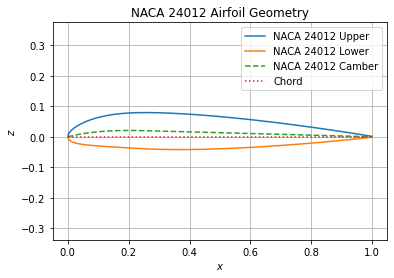

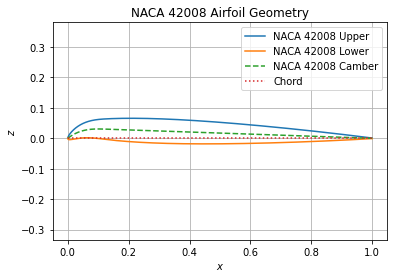

In [8]:
#Define values for 5-number NACA
c = 1
L = 2
P = 4
TT = 12

#Use new function to create points
NACA24012_x, NACA24012_z_c, NACA24012_z_t = FiveDigitCamberedNACA(c, L, P, TT)

#Use the old function to plot the points
PlotCamberedAifroil(NACA24012_x, NACA24012_z_c, NACA24012_z_t, "NACA 24012")


#Define values for 5-number NACA
c = 1
L = 4
P = 2
TT = 8

#Use new function to create points
NACA42008_x, NACA42008_z_c, NACA42008_z_t = FiveDigitCamberedNACA(c, L, P, TT)

#Use the old function to plot the points
PlotCamberedAifroil(NACA42008_x, NACA42008_z_c, NACA42008_z_t, "NACA 42008")

### Problem 2
In this problem, we will be looking at airfoil wake drag. We are given an equation for the sectional drag of an airfoil as an integral of the flow velocity distribution over the flow streamlines:

$
\begin{equation}
D' = \rho\int_{b}^{h} u_2(u_1-u_2)dy
\end{equation}
$

The density ($\rho$) of air was given to be 1.2 $\frac{kg}{m^3}$. For $\frac{y}{c}$, $u_1$ and $u_2$, we were given a CSV file containing the measurements at discrete points. For $u_1$, the flow distribution is assumed to be uniform prior to the airfoil. In this case, I chose to use numpy's average() function to take the average of the given $u_1$ data and use that value for the rest of the calculations. As for $u_2$, I initially performed the integration using numpy's trapz() function and the given data. 

If we plot the data though, we will notice it is not very continuous which is not really representative of a real flow distribution. Because of this, we chose to create a polynomial fit of $u_2$ using numpy's polyfit and poly1d functions. The curve fitting was found to fit best at a 6th order polynomial. The fitted and original data are shown below in a plot. Using the new $u_2$ fit polynomial, we can plot more points on the $\frac{y}{c}$ axis and read values for $u_2$ since $u_1$ is assumed to be static. Another integration was performed using the new points and the output is also shown below.

I chose to use the 6th order fit, since the 2nd and 4th order fits are quite inaccurate at the endpoints. Comparing the raw data and the 6th order approximation, the drag values for each method are quite similar, only varying by about 0.00316 or 0.9%

In [9]:
#Read the data from the datafile
y_non, u1, u2 = np.loadtxt('C:/Users/Joseph/Documents/Python/Data/WakeVelDist.dat',unpack=True,delimiter=',')

#Define rho and u1 as constants
rho = 1.2
u1 = np.average(u1)

#Create a 2nd order fit for u2
u2_fit_coeff_2 = np.polyfit(y_non, u2, 2)
u2_fit_2 = np.poly1d(u2_fit_coeff_2)

#Create a 4th order fit for u2
u2_fit_coeff_4 = np.polyfit(y_non, u2, 4)
u2_fit_4 = np.poly1d(u2_fit_coeff_4)

#Create a 6th order fit for u2
u2_fit_coeff_6 = np.polyfit(y_non, u2, 6)
u2_fit_6 = np.poly1d(u2_fit_coeff_6)

#Create a vector of y values to plot each fit line
y_non_plot = np.linspace(np.min(y_non), np.max(y_non), 200)
u2_fit_plot_2 = u2_fit_2(y_non_plot)
u2_fit_plot_4 = u2_fit_4(y_non_plot)
u2_fit_plot_6 = u2_fit_6(y_non_plot)

#Generate a plot
plt.title("$u_2$ Data vs. Fit")
plt.xlabel("$y/c$")
plt.ylabel("$u_2$")
plt.plot(y_non, u2, label = "$u_2$ Data")
plt.plot(y_non_plot, u2_fit_plot_2, label = "$u_2$ 2nd Order Fit")
plt.plot(y_non_plot, u2_fit_plot_4, label = "$u_2$ 4th Order Fit")
plt.plot(y_non_plot, u2_fit_plot_6, label = "$u_2$ 6th Order Fit")
plt.grid()
plt.legend()
plt.show()

#Calculate drag using the equation and perform the integral using trapz
SectionDrag_Data = rho*np.trapz(u2*(u1 - u2), x = y_non)
SectionDrag_fit_2 = rho*np.trapz(u2_fit_plot_2*(u1 - u2_fit_plot_2), x = y_non_plot)
SectionDrag_fit_4 = rho*np.trapz(u2_fit_plot_4*(u1 - u2_fit_plot_4), x = y_non_plot)
SectionDrag_fit_6 = rho*np.trapz(u2_fit_plot_6*(u1 - u2_fit_plot_6), x = y_non_plot)

#Print out the drags and percent differences of unfit to fit data
print("Section Drag (Data u2) = {} [Drag/unit span]".format(SectionDrag_Data))

print("Section Drag (Fitted u2, 2nd order) = {} [Drag/unit span]".format(SectionDrag_fit_2))
print("Percent Difference of Data and 2nd order = {} Percent".format(100*abs(SectionDrag_Data - SectionDrag_fit_2)/SectionDrag_fit_2))

print("Section Drag (Fitted u2, 4th order) = {} [Drag/unit span]".format(SectionDrag_fit_6))
print("Percent Difference of Data and 4th order = {} Percent".format(100*abs(SectionDrag_Data - SectionDrag_fit_4)/SectionDrag_fit_4))

print("Section Drag (Fitted u2, 6th order) = {} [Drag/unit span]".format(SectionDrag_fit_6))
print("Percent Difference of Data and 6th order = {} Percent".format(100*abs(SectionDrag_Data - SectionDrag_fit_6)/SectionDrag_fit_6))


OSError: C:/Users/Joseph/Documents/Python/Data/WakeVelDist.dat not found.

### Problem 3
In this problem, we will be looking at the XFOIL program which can simulate and give us coefficient data for various airfoil geometries. Convergence for a Reynold's number of 6e8 was not occuring so the following data for the viscous regime is using a Reynold's number of 6e5.

#### 3.1
In this section, we want to look at how the NACA 0010, 1410 and 2410 airfoils behave at different angle of attacks. Specifically, we are using Xfoil to derive data of the upper and lower pressure distributions and plotting these in Python.

First, a function called SplitIndex() was made to split the list into an upper and lower part. Xfoil stores the data into a single continuous list but we want two lists corresponding to the upper and lower distributions. Since Xfoil goes from one to zero (upper) and back to one (lower), we can create a function that iterates through values of $\frac{x}{c}$ to find the transition point from upper and lower distributions.

After creating the SplitIndex() function, the ReadCpData() function was made that uses the SplitIndex() and outputs the upper and lower $\frac{x}{c}$ points and their corresponding $C_P$ data.

We then plotted the $C_P$ vs $\frac{x}{c}$ for several values of $\alpha$ in the viscous case, where $Re = 6e8$ which can be seen below.

Looking at the plots we might notice a few differences between the symmetric airfoil (0018) and the cambered airfoils (1410, 2410). At an $\alpha$ of zero, we can see that there is only one line representing the surface pressure distributions for both the upper and lower surfaces of the symmetric airfoil. Naturally, at a zero angle-of-attack symmetric airfoil, we can expect a $C_l$ of zero which is a result of equal surface pressures on both the top and bottom surface due to it's symmetry. On the other hand, a cambered airfoil will have a non-zero $C_l$ at an $\alpha$ of zero, since the camber implies a longer upper surface length which also implies a lower pressure on top of the airfoil (based on Bernoulli's). This can be seen in the plots where the $C_P$ over the upper surface is, on average, more negative (lower pressure) than the lower surface.

We can also recall from class that in a $C_l$ vs. $\alpha$ plot, a more cambered airfoil will tend to have a higher $C_l$ at a given $\alpha$ for values of $\alpha$ inside the linear region of the plot. This relationshiup can also be seen in the plot, where the more cambered airfoils tend towards a less negative lower surface and more negative upper surface pressure distribution for $\alpha = -5$ which implies a less negative overall $C_l$. On the other hand we can also see that for $\alpha = 12$, the higher camber gives a more negative upper surface pressure distribution and roughly the same lower surface pressure distribution which implies a larger overall $C_l$.

Comparing the three plots, the $\alpha$ = 12 case seems to have the largest (negative) peak $C_P$. This sudden drop in pressure may come from both the camber and the angle of attack. By having a (realtively) large angle of attack on a positively cambered airfoil, the streamlines hitting the leading edge has to follow the upper surface and turn sharply. The high angle of attack and camber can both affect how much faster the stream moves around the airfoil which creates a pressure drop near the leading edge.

In [ ]:
#Create a function that splits the upper and lower surfaces of the airfoil
def SplitIndex(x):
    i = 0
    while x[i] > x[i+1]:
        i += 1

    return i + 1

#Read CP data from a given file
def ReadCpData(filename):
    #Load txt file
    x, y, Cp = np.loadtxt(filename,unpack=True, skiprows=3)

    #Use the SplitIndex() function
    i = SplitIndex(x)

    #Use indexing to split x and CP (we are not (yet) concerned with y)
    Upper_x = x[0:i]
    Upper_Cp = Cp[0:i]

    Lower_x = x[i:]
    Lower_Cp = Cp[i:]
    #Reverse the order of Lower to get it from x = 1 to x = 0
    Lower_x = Lower_x[::-1]
    Lower_Cp = Lower_Cp[::-1]

    return Upper_x, Upper_Cp, Lower_x, Lower_Cp


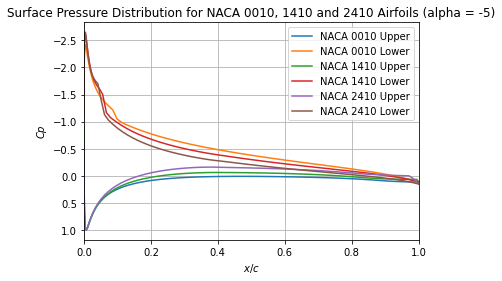

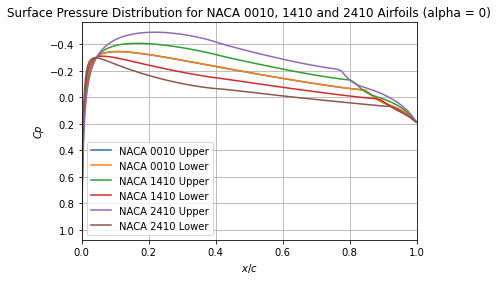

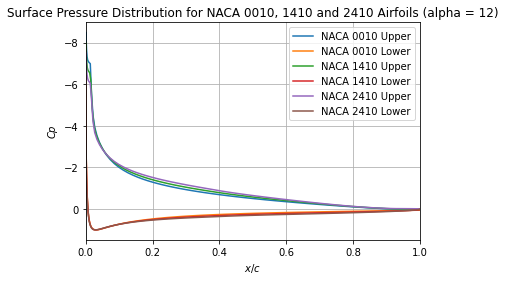

In [ ]:
#Read and plot x vs CP data for alpha = -5
NACA0010_Upper_x, NACA0010_Upper_Cp, NACA0010_Lower_x, NACA0010_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA0010_v_-5.txt')
plt.plot(NACA0010_Upper_x, NACA0010_Upper_Cp, label = 'NACA 0010 Upper')
plt.plot(NACA0010_Lower_x, NACA0010_Lower_Cp, label = 'NACA 0010 Lower')

NACA1410_Upper_x, NACA1410_Upper_Cp, NACA1410_Lower_x, NACA1410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA1410_v_-5.txt')
plt.plot(NACA1410_Upper_x, NACA1410_Upper_Cp, label = 'NACA 1410 Upper')
plt.plot(NACA1410_Lower_x, NACA1410_Lower_Cp, label = 'NACA 1410 Lower')

NACA2410_Upper_x, NACA2410_Upper_Cp, NACA2410_Lower_x, NACA2410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA2410_v_-5.txt')
plt.plot(NACA2410_Upper_x, NACA2410_Upper_Cp, label = 'NACA 2410 Upper')
plt.plot(NACA2410_Lower_x, NACA2410_Lower_Cp, label = 'NACA 2410 Lower')

plt.xlim([0,1])
plt.gca().invert_yaxis()
plt.title("Surface Pressure Distribution for NACA 0010, 1410 and 2410 Airfoils (alpha = -5)")
plt.xlabel("$x/c$")
plt.ylabel("$Cp$")
plt.legend(loc='best')
plt.grid()
plt.show()

#Read and plot x vs CP data for alpha = 0
NACA0010_Upper_x, NACA0010_Upper_Cp, NACA0010_Lower_x, NACA0010_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA0010_v_0.txt')
plt.plot(NACA0010_Upper_x, NACA0010_Upper_Cp, label = 'NACA 0010 Upper')
plt.plot(NACA0010_Lower_x, NACA0010_Lower_Cp, label = 'NACA 0010 Lower')

NACA1410_Upper_x, NACA1410_Upper_Cp, NACA1410_Lower_x, NACA1410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA1410_v_0.txt')
plt.plot(NACA1410_Upper_x, NACA1410_Upper_Cp, label = 'NACA 1410 Upper')
plt.plot(NACA1410_Lower_x, NACA1410_Lower_Cp, label = 'NACA 1410 Lower')

NACA2410_Upper_x, NACA2410_Upper_Cp, NACA2410_Lower_x, NACA2410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA2410_v_0.txt')
plt.plot(NACA2410_Upper_x, NACA2410_Upper_Cp, label = 'NACA 2410 Upper')
plt.plot(NACA2410_Lower_x, NACA2410_Lower_Cp, label = 'NACA 2410 Lower')

plt.xlim([0,1])
plt.gca().invert_yaxis()
plt.title("Surface Pressure Distribution for NACA 0010, 1410 and 2410 Airfoils (alpha = 0)")
plt.xlabel("$x/c$")
plt.ylabel("$Cp$")
plt.legend(loc='best')
plt.grid()
plt.show()

#Read and plot x vs CP data for alpha = 12
NACA0010_Upper_x, NACA0010_Upper_Cp, NACA0010_Lower_x, NACA0010_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA0010_v_12.txt')
plt.plot(NACA0010_Upper_x, NACA0010_Upper_Cp, label = 'NACA 0010 Upper')
plt.plot(NACA0010_Lower_x, NACA0010_Lower_Cp, label = 'NACA 0010 Lower')

NACA1410_Upper_x, NACA1410_Upper_Cp, NACA1410_Lower_x, NACA1410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA1410_v_12.txt')
plt.plot(NACA1410_Upper_x, NACA1410_Upper_Cp, label = 'NACA 1410 Upper')
plt.plot(NACA1410_Lower_x, NACA1410_Lower_Cp, label = 'NACA 1410 Lower')

NACA2410_Upper_x, NACA2410_Upper_Cp, NACA2410_Lower_x, NACA2410_Lower_Cp = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA2410_v_12.txt')
plt.plot(NACA2410_Upper_x, NACA2410_Upper_Cp, label = 'NACA 2410 Upper')
plt.plot(NACA2410_Lower_x, NACA2410_Lower_Cp, label = 'NACA 2410 Lower')

plt.xlim([0,1])
plt.gca().invert_yaxis()
plt.title("Surface Pressure Distribution for NACA 0010, 1410 and 2410 Airfoils (alpha = 12)")
plt.xlabel("$x/c$")
plt.ylabel("$Cp$")
plt.legend(loc='best')
plt.grid()
plt.show()

#### 3.2
Next, we can compare the viscous and inviscid simulations of the NACA 0010 airfoil. Below are both cases plotted on the same figure.

It seems that between the viscous and inviscid cases, the viscous case has a pressurce coefficient closer to the zero value. That is, the upper surface pressure coefficients seem to be higher (less negative) and the lower surface pressure coefficients seem to be lower. This may contribute to a lower overall lift coefficient since the upper surface increase is rather significant compared to other variations. An increase of pressure at the front may also imply an increase in drag force which we can expect to be higher (by a significant amount) than the inviscid case.

The difference in pressure coefficients can be explained by thinking about the boundary layer. In the viscous case, we are now considering a no-slip region and the viscosity of the air which slows down the air based on a boundary layer velocity profile. By decreasing the velocity of the flow, the static pressure at each point is slightly reduced depending on how much of a contribution the velocity had on the pressure at that point.

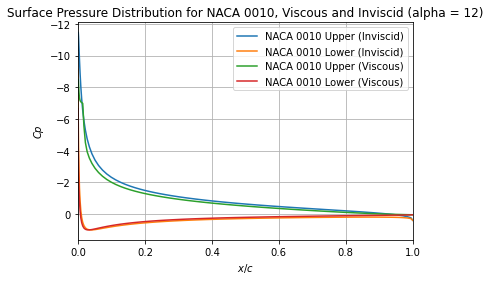

In [ ]:
#Read and plot x vs CP data for alpha = 12, inviscid and viscid for NACA 0010
NACA0010_Upper_x_i, NACA0010_Upper_Cp_i, NACA0010_Lower_x_i, NACA0010_Lower_Cp_i = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA0010_i_12.txt')
plt.plot(NACA0010_Upper_x_i, NACA0010_Upper_Cp_i, label = 'NACA 0010 Upper (Inviscid)')
plt.plot(NACA0010_Lower_x_i, NACA0010_Lower_Cp_i, label = 'NACA 0010 Lower (Inviscid)')


NACA0010_Upper_x_v, NACA0010_Upper_Cp_v, NACA0010_Lower_x_v, NACA0010_Lower_Cp_v = ReadCpData('C:/Users/Joseph/Documents/Python/Data/NACA0010_v_12.txt')
plt.plot(NACA0010_Upper_x_v, NACA0010_Upper_Cp_v, label = 'NACA 0010 Upper (Viscous)')
plt.plot(NACA0010_Lower_x_v, NACA0010_Lower_Cp_v, label = 'NACA 0010 Lower (Viscous)')

plt.xlim([0,1])
plt.gca().invert_yaxis()
plt.title("Surface Pressure Distribution for NACA 0010, Viscous and Inviscid (alpha = 12)")
plt.xlabel("$x/c$")
plt.ylabel("$Cp$")
plt.legend(loc='best')
plt.grid()
plt.show()

#### 3.3
Now, we can try comparing the lift, drag and moment coefficients computed by XFOIL to ones we can compute using the surface pressure distribution. We can first find the coefficients for the normal force, axial force and moment at the leading edge using our pressure distributions and some general geometry of the airfoil:

$
\begin{equation}
\begin{split}
C_n &= \frac{1}{c}\left[ \int_0^c(C_{P,l}-C_{P,u})dx \right]\\
C_a &= \frac{1}{c}\left[ \int_0^c(C_{P,u}\frac{dz_u}{dx}-C_{P,l}\frac{dz_l}{dx})dx \right]\\
C_{m,LE} &= \frac{1}{c^2}\left[ \int_0^c(C_{P,u}-C_{P,l})xdx \right]\\
\end{split}
\end{equation}
$

Next, we can use these values to find the lift, drag and quarter-chord moment coefficients of the airfoil and compare them to XFOIL's values.

$
\begin{equation}
\begin{split}
C_l &= C_n \cos(\alpha) - C_a \sin(\alpha)\\
C_d &= C_n \sin(\alpha) + C_a \cos(\alpha)\\
C_{m,c_{\frac{1}{4}}} &= C_{m, LE} + C_lx_{c_{\frac{1}{4}}}
\end{split}
\end{equation}
$

We would first need to split the airfoil data into upper and lower sections but we also need to make sure that the number of data points for both the upper and lower cases match since we are applying numerical integration and differentiation. The integrations and derivatives will all be handled using built-in functions of numpy such as trapz() and gradient(). Since the data was stored in the reverse order (from $x = 1$ to $0$), we can take the integral and apply a negative sign (based on the Fundamental Theorem of Calculus) to get the original integral.

The calculations were done in both the viscid and inviscid cases and the results are tabulated below:

Inviscid: 
| Method | $C_l$ | $C_d$ | $C_m$ |
| --- | --- | --- | --- |
| XFOIL | 1.6627 | -0.00117 | -0.0698 |
|Integration | 1.6455 | -0.01291 | -0.0616 |

Viscous: 
| Method | $C_l$ | $C_d$ | $C_m$ |
| --- | --- | --- | --- |
| XFOIL | 1.3278 | 0.02261 | -0.0178 |
|Integration | 1.3226 | 0.01144 | -0.0105 |

The results are actually rather close to that of XFOIL except for the $C_d$ in the inviscid regime. A small error in the calculation may come from the indices of the upper rand lower surfaces, where the upper surface has two more datapoints than the lower surface. Becasue of this, we had to truncate the two extra datapoints at the upper surface in order to let the numerical integration proceed without any error. With such a small magnitude of $C_d$, it may be possible that such a large relative error came from the truncation of just two datapoints. An alternative would be to interpolate the data but this may introduce its own errors to the calculations.

In [ ]:
#Read x, y and CP data for NACA 2410 inviscid at alpha = 12
NACA2410x, NACA2410y, NACA2410Cp = np.loadtxt('C:/Users/Joseph/Documents/Python/Data/NACA2410_i_12.txt', unpack=True, skiprows=3)

#Use the same methods as the ReadCp function but we extract y (or z) also (for dz/dx)
i = SplitIndex(NACA2410x)

#i ends up being 81 so we need to match the number of upper and lower data points to 79
NACA2410_Upper_x = NACA2410x[0:i-2]
NACA2410_Upper_y = NACA2410y[0:i-2]
NACA2410_Upper_Cp = NACA2410Cp[0:i-2]

#Extract lower data
Lower_x = NACA2410x[i:]
Lower_y = NACA2410y[i:]
Lower_Cp = NACA2410Cp[i:]

NACA2410_Lower_x = Lower_x[::-1]
NACA2410_Lower_y = Lower_y[::-1]
NACA2410_Lower_Cp = Lower_Cp[::-1]

#Use the gradient function to get dz/dx on upper and lower surfaces
dzdx_Upper = np.gradient(NACA2410_Upper_y, NACA2410_Upper_x)
dzdx_Lower = np.gradient(NACA2410_Lower_y, NACA2410_Lower_x)

#Calculate C_n, C_a and C_mLE for inviscid data
C_n_i = -np.trapz((NACA2410_Lower_Cp - NACA2410_Upper_Cp), NACA2410_Upper_x)
C_a_i = -np.trapz((NACA2410_Upper_Cp*dzdx_Upper - NACA2410_Lower_Cp*dzdx_Lower), NACA2410_Upper_x)
C_mLE_i = -np.trapz((NACA2410_Upper_Cp - NACA2410_Lower_Cp)*NACA2410_Upper_x, NACA2410_Upper_x)

print("Inviscid: Cn = {}, Ca = {}, Cm_LE = {}".format(C_n_i, C_a_i, C_mLE_i))

#Calculate C_l, C_d and C_m using the equations
C_l_i = C_n_i*np.cos(np.radians(12)) - C_a_i*np.sin(np.radians(12))
C_d_i = C_n_i*np.sin(np.radians(12)) + C_a_i*np.cos(np.radians(12))
C_m_i = C_mLE_i + C_l_i*0.25

print("Inviscid: Cl = {}, Cd = {}, Cm = {}".format(C_l_i, C_d_i, C_m_i))

#Repeat the same process for viscous case
NACA2410x, NACA2410y, NACA2410Cp = np.loadtxt('C:/Users/Joseph/Documents/Python/Data/NACA2410_v_12.txt', unpack=True, skiprows=3)

i = SplitIndex(NACA2410x)

NACA2410_Upper_x = NACA2410x[0:i-2]
NACA2410_Upper_y = NACA2410y[0:i-2]
NACA2410_Upper_Cp = NACA2410Cp[0:i-2]

Lower_x = NACA2410x[i:]
Lower_y = NACA2410y[i:]
Lower_Cp = NACA2410Cp[i:]

NACA2410_Lower_x = Lower_x[::-1]
NACA2410_Lower_y = Lower_y[::-1]
NACA2410_Lower_Cp = Lower_Cp[::-1]

dzdx_Upper = np.gradient(NACA2410_Upper_y, NACA2410_Upper_x)
dzdx_Lower = np.gradient(NACA2410_Lower_y, NACA2410_Lower_x)

C_n_v = -np.trapz((NACA2410_Lower_Cp - NACA2410_Upper_Cp), NACA2410_Upper_x)
C_a_v = -np.trapz((NACA2410_Upper_Cp*dzdx_Upper - NACA2410_Lower_Cp*dzdx_Lower), NACA2410_Upper_x)
C_mLE_v = -np.trapz((NACA2410_Upper_Cp - NACA2410_Lower_Cp)*NACA2410_Upper_x, NACA2410_Upper_x)

print("Viscous: Cn = {}, Ca = {}, Cm_LE = {}".format(C_n_v, C_a_v, C_mLE_v))

C_l_v = C_n_v*np.cos(np.radians(12)) - C_a_v*np.sin(np.radians(12))
C_d_v = C_n_v*np.sin(np.radians(12)) + C_a_v*np.cos(np.radians(12))
C_m_v = C_mLE_v + C_l_v*0.25

print("Viscous: Cl = {}, Cd = {}, Cm = {}".format(C_l_v, C_d_v, C_m_v))

Inviscid: Cn = 1.6069538586500003, Ca = -0.35477392836764754, Cm_LE = -0.473095436808086
Inviscid: Cl = 1.645599708633405, Cd = -0.012916773017677297, Cm = -0.06169550964973475
Viscous: Cn = 1.2961467897, Ca = -0.263808712351366, Cm_LE = -0.34119504793283645
Viscous: Cl = 1.322671787981308, Cd = 0.011440211555374447, Cm = -0.01052710093750947


### Problem 4
In this section, we are tasked with plotting the coefficient of lift ($C_L$), coefficient of drag ($C_D$) and the lift-to-drag ratio ($\frac{L}{D}) of a given airplane. We were given the following information regarding the plane and flight conditions:

$
\begin{equation}
\begin{split}
W &= 2950 \text{lbm}\\
S &= 174 \text{ft}^2\\
\rho_\infty &= 0.002377 \frac{\text{slug}}{\text{ft}^3}\\
V_\infty &= [70, 250] \left( \frac{\text{ft}}{\text{s}} \right)\\
C_D &= 0.025 + 0.054C_L^2
\end{split}
\end{equation}
$

We were also told that the airplane is undergoing steady, level flight at sea level. This implies that our lift is equal to our weight (in lbf) since we are not rising. We can calculate our $C_L$ as a function of $V_\infty$ as shown:

$
\begin{equation}
C_L = \frac{L}{\frac{1}{2}\rho_\infty V_\infty^2 S} = \frac{2950}{\frac{1}{2}(0.002377) V_\infty^2 (174)} \left[ \frac{\text{lbf}}{\frac{\text{slug}}{\text{ft}^3}\text{ft}^2} \right]
\end{equation}
$

Since we already have $C_D$ in terms of $C_L$, and we also know that $\frac{L}{D}$ is equivalent to $\frac{C_L}{C_D}$, we can simply calculate and plot these in Python.

As we can see in the plot below, $C_L$ decreases as $V_\infty$ increases since the two quantities are inversely proportional squared. This makes sense since we want to keep the same $L$ at an increasing velocity, which means we need to decrease our lift coefficient. 

As for the $C_D$, we were given an equation for $C_D$ in terms of $C_L$ for this configuration which involves a constant term and a quadratic term. Initially, while $C_L$ is large and $V_\infty$ is low, the quadratic term is dominant. At a certain point though, as $C_L$ decreases the quadratic term will shrink and the constant term will be dominant. This is why the $C_D$ value initially starts out at a rather large value and settles to a constant value, where $C_D$ goes to 0.025 as $C_L$ goes to zero.

This change in dominant terms is what causes the parabolic peak in $\frac{C_L}{C_D}$. Initially, $\frac{C_L}{C_D}$ is approximately $\frac{C_L}{C_L^2}$ (since the quadratic term is dominant) which can be approximated to $\frac{V_\infty^{-2}}{V_\infty^{-4}} = V_\infty^2$. This explains the rising portion and inversely, when the constant term is dominant $\frac{C_L}{C_D}$ can be approximated as $V_\infty^{-2}$ which explains the falling portion.

The main take-away here is that we have an optimal region for maximum lift with respect to drag and ideally, we want to design a plane to be in this region.

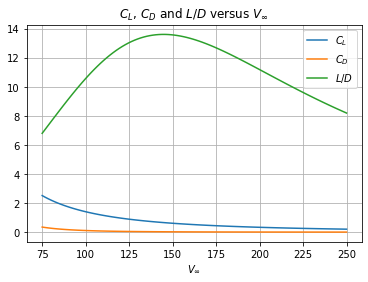

In [ ]:
#Create a range of values for V_inf
V_range = np.linspace(75, 250, 100)

#Calculate C_L and C_D for each V_inf value
C_L = 2950/(0.5*0.002377*(V_range**2)*174)
C_D = 0.025 + 0.054*(C_L**2)

#Plot C_L, C_D and C_L/C_D
plt.plot(V_range, C_L, label = "$C_L$")
plt.plot(V_range, C_D, label = "$C_D$")
plt.plot(V_range, C_L/C_D, label = "$L/D$")
plt.legend(loc = "best")
plt.title("$C_L$, $C_D$ and $L/D$ versus $V_\infty$")
plt.xlabel("$V_\infty$")
plt.grid()
plt.show()